# **Project Name**    - DeepFER: Facial Emotion Recognition Using Deep Learning



##### **Project Type**    - Computer Vision
##### **Contribution**    - Individual
##### **Name**     - Lokesh Todi


# **Project Summary -**

## Project Summary

- **DeepFER** is an advanced deep learning-based system for facial emotion recognition, aiming to accurately identify human emotions from facial images.
- The system utilizes advanced computer vision techniques, mainly:
  - **Convolutional Neural Networks (CNNs)**
  - **Transfer Learning**
- Capable of classifying faces into seven distinct emotional categories:
  - Angry
  - Sad
  - Happy
  - Fear
  - Neutral
  - Disgust
  - Surprise
- **Significance**:
  - Real-time emotion recognition is becoming crucial in everyday life.
  - Applications include enhancing human-computer interaction, mental health systems, and personalized customer service.

---

- **Traditional Methods**:
  - Relied on handcrafted features and rule-based algorithms.
  - Often struggled to generalize across diverse datasets and real-world variations.

- **How DeepFER Improves On This**:
  - Uses CNNs, which can learn hierarchical features directly from raw pixel data.
  - Consistently achieves superior performance in image classification.
  - **Transfer Learning** is employed for fine-tuning pre-trained networks, improving generalization and reducing required training time, particularly with limited data.

---

- **Dataset**:
  - Composed of high-resolution facial images from public repositories and crowd-sourcing.
  - Each image is labeled with its corresponding emotion for supervised learning.
  - The images reflect a broad range of expressions, lighting conditions, backgrounds, and orientations.
  - Data augmentation methods such as rotation, flipping, and scaling are used to increase dataset diversity and model generalizability.

---

- **DeepFER Pipeline**:
  - **Data preprocessing**:
    - Convert images to grayscale.
    - Resize all images to 48x48 pixels.
  - **Model Input**:
    - Processed images are input into a CNN (custom or transferred from VGG, ResNet, or MobileNet).
  - **Training Objective**:
    - Minimize categorical cross-entropy loss.
    - Optimize classification accuracy across all emotion classes.
  - **Performance Metrics**:
    - Accuracy
    - Precision
    - Recall
    - F1-score (evaluated on validation and test sets)

---

- **Real-Time Deployment**:
  - Interfaces built using Streamlit and OpenCV.
  - Two user modes:
    - **Image upload**: Instant emotion prediction for uploaded images.
    - **Webcam mode**: Live detection and classification of emotions during video capture.
  - These features demonstrate DeepFER's practical use in real-world scenarios.

---

- **Project Objective**:
  - Bridge the gap between deep learning research and deployment of real-world emotion-aware systems.
  - Designed for high accuracy and real-time responsiveness.
  - Potential applications:
    - Digital assistants
    - Adaptive e-learning systems
    - Sentiment-driven chatbots
    - Early indicators in mental health monitoring

---

- **Summary**:
  - DeepFER offers a comprehensive, scalable deep learning solution for facial emotion recognition.
  - Integrates robust model design, strong data handling, and easy deployment.
  - Provides a streamlined pipeline from raw images to rapid emotion analysis.
  - Contributes to the development of empathetic and intelligent human-machine interactions.


# **GitHub Link -**

https://github.com/LokeCoder11/Facial_Emotion_Recognition_Using_Deep_Learning

# **Problem Statement**


## Problem Statement

- Recognizing human emotions from facial expressions presents several challenges, such as:
  - Variations in lighting conditions
  - Differences in facial pose
  - Unique individual features

- Traditional approaches often:
  - Lack sufficient accuracy
  - Struggle to generalize across different environments and individuals

- The goal of this project is to develop **DeepFER**, a deep learning-based facial emotion recognition system that:
  - Utilizes Convolutional Neural Networks (CNNs)
  - Employs Transfer Learning to leverage pre-trained models

- **DeepFER** is designed to:
  - Classify facial emotions accurately and efficiently in real time
  - Support applications such as:
    - Human-computer interaction
    - Mental health monitoring
    - Customer service enhancement


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Core Libraries
import numpy as np
import pandas as pd
import os
import glob
import cv2
import scipy

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow / Keras - Deep Learning
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Metrics
from sklearn.metrics import confusion_matrix, classification_report

# Version Check
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


### Dataset Loading

In [ ]:
# Load Dataset
# Set dataset path
dataset_path = 'images'
# Defining train and validation path
train_path = "images/train"
val_path = "images/validation"

In [ ]:
# data categories
categories = os.listdir(train_path)
print(categories)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
# Training images
total_train_images = 0
for dir_ in os.listdir(train_path):
    count = 0
    for f in os.listdir(train_path+'/' + dir_+"/"):
        count += 1
        total_train_images += 1
    print(f"{dir_.upper()} has {count} number of images. ")

print(f"\nTotal train images are {total_train_images} .")

ANGRY has 3993 number of images. 
DISGUST has 436 number of images. 
FEAR has 4103 number of images. 
HAPPY has 7164 number of images. 
NEUTRAL has 4982 number of images. 
SAD has 4938 number of images. 
SURPRISE has 3205 number of images. 

Total train images are 28821 .


In [ ]:
# Validation Images
total_validation_images = 0
for dir_ in os.listdir(val_path):
    count = 0
    for f in os.listdir(val_path+'/' + dir_+"/"):
        count += 1
        total_validation_images += 1
    print(f"{dir_.upper()} has {count} number of images. ")

print(f"\nTotal validation images are {total_validation_images} .")

ANGRY has 960 number of images. 
DISGUST has 111 number of images. 
FEAR has 1018 number of images. 
HAPPY has 1825 number of images. 
NEUTRAL has 1216 number of images. 
SAD has 1139 number of images. 
SURPRISE has 797 number of images. 

Total validation images are 7066 .


### Displaying Images For Each Emotion In Train Set

In [ ]:
# Creating a function for using for show some images from each categories
def imageshow(category):
  plt.figure(figsize= (8,8))
  for i in range(1, 10, 1):
      plt.subplot(3,3,i)
      img = load_img(train_path+'/'+category+"/"+
                    os.listdir(train_path + "/" + category)[i], target_size=(48,48))
      plt.imshow(img)
  plt.suptitle(category,fontsize=30)
  plt.show()

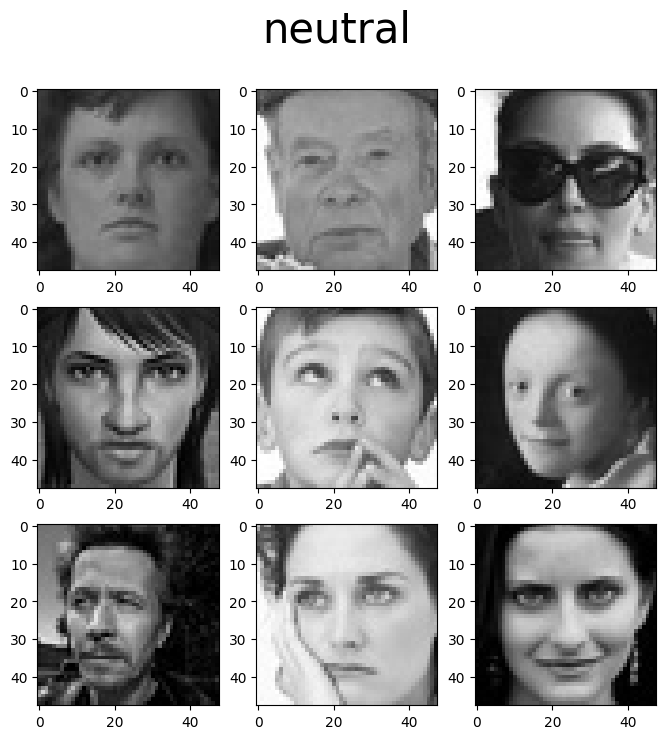

In [ ]:
#Showing some images from category neutral
imageshow('neutral')

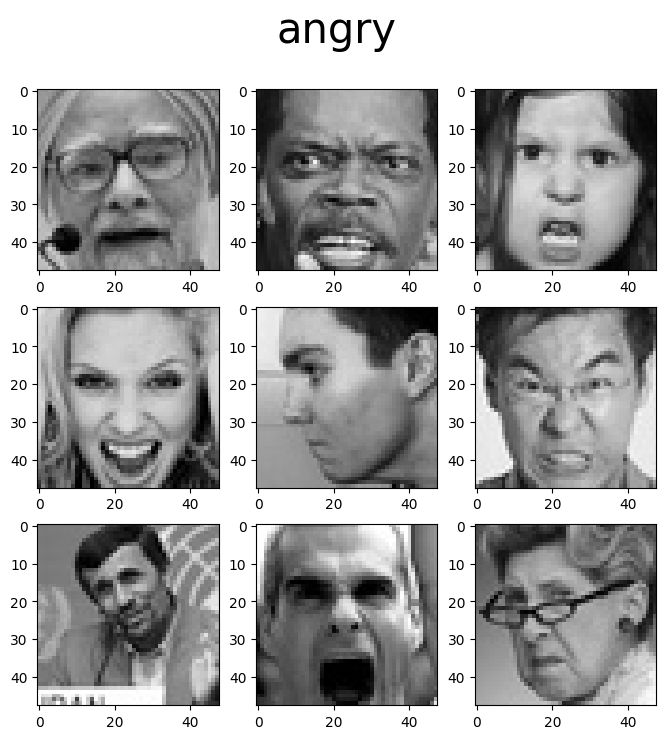

In [ ]:
#Showing some images from category angry
imageshow('angry')

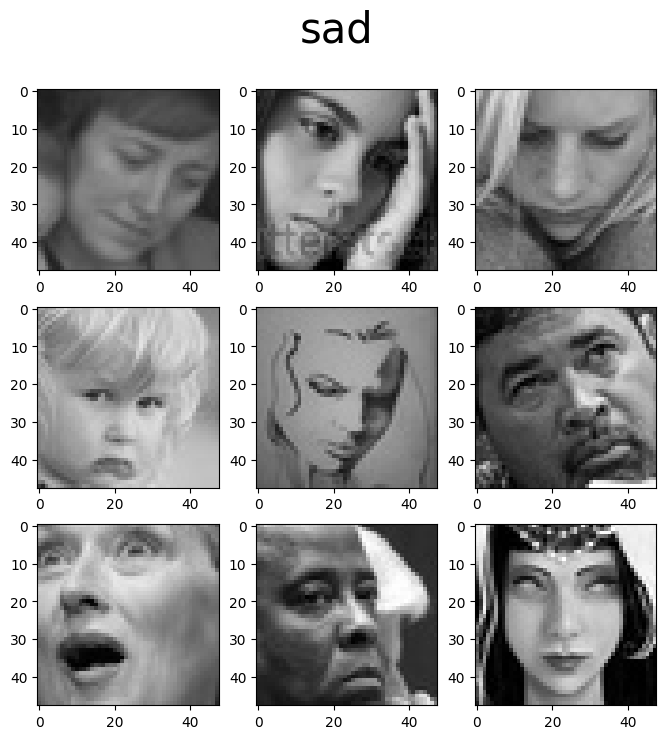

In [ ]:
#Showing some images from category sad
imageshow('sad')

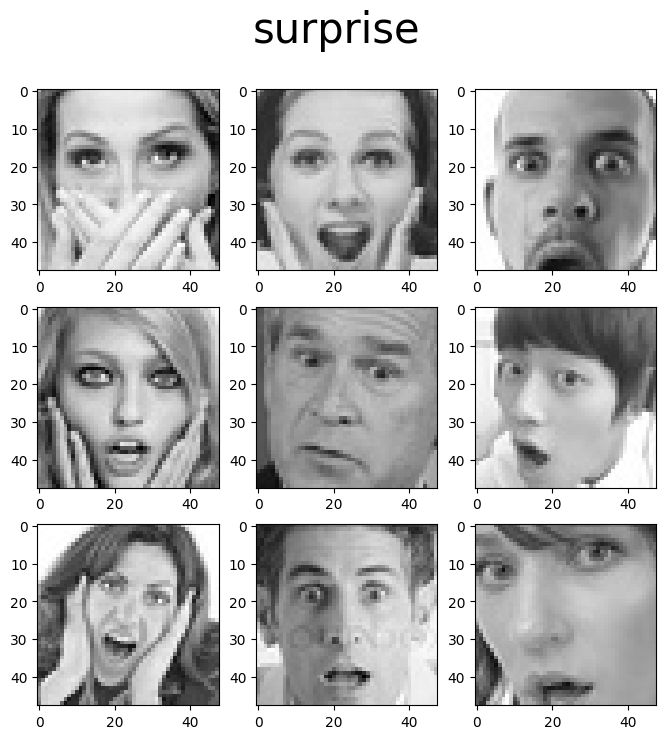

In [ ]:
#Showing some images from category surprise
imageshow('surprise')

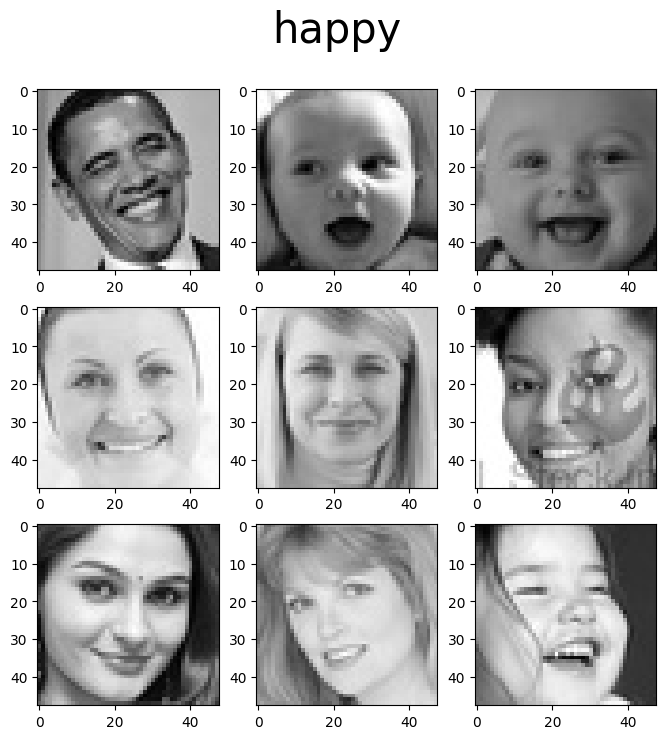

In [ ]:
#Showing some images from category happy
imageshow('happy')

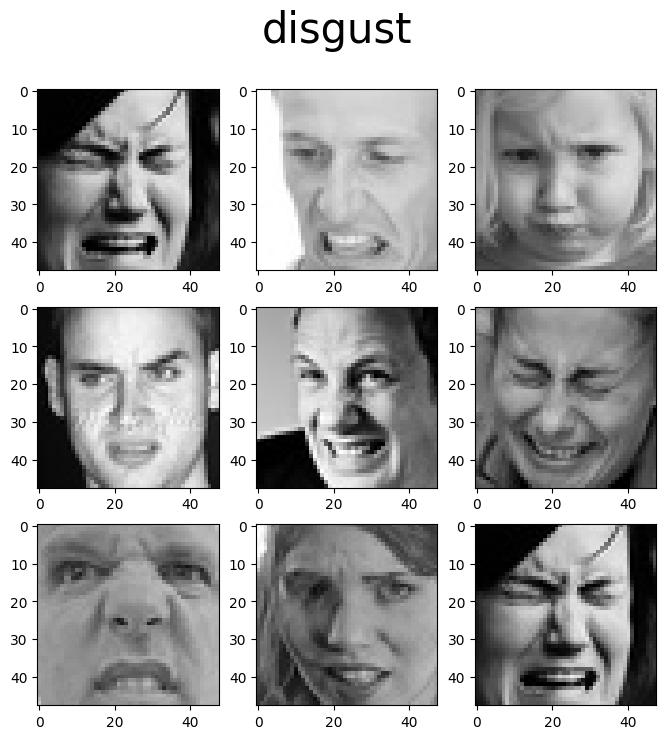

In [ ]:
#Showing some images from category disgust
imageshow('disgust')

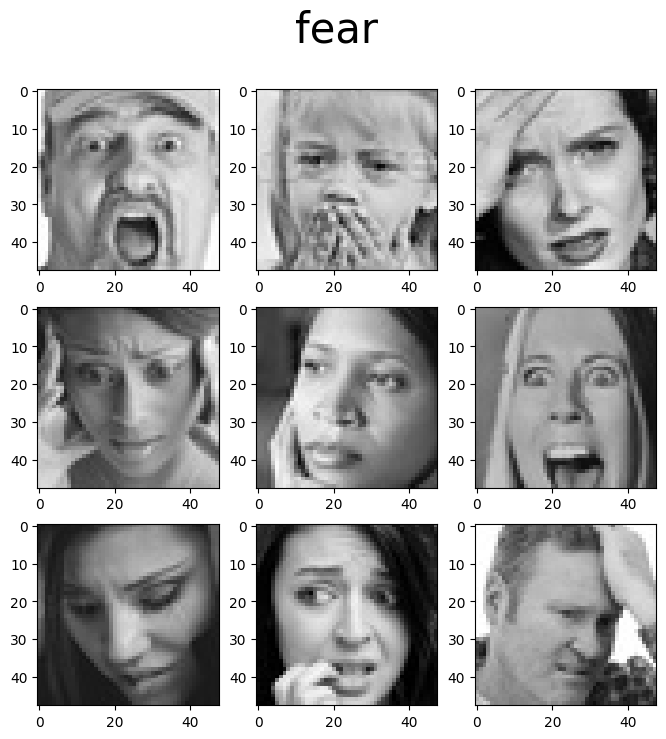

In [ ]:
#Showing some images from category fear
imageshow('fear')

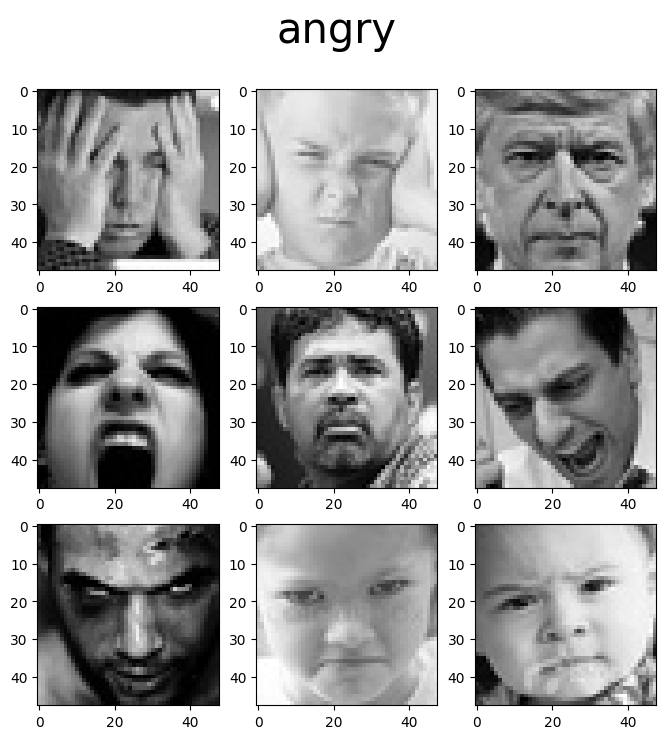

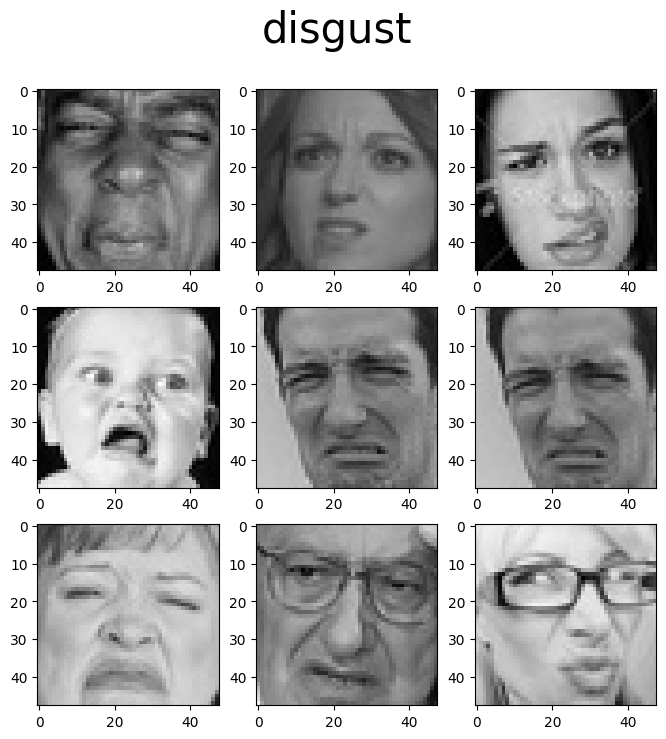

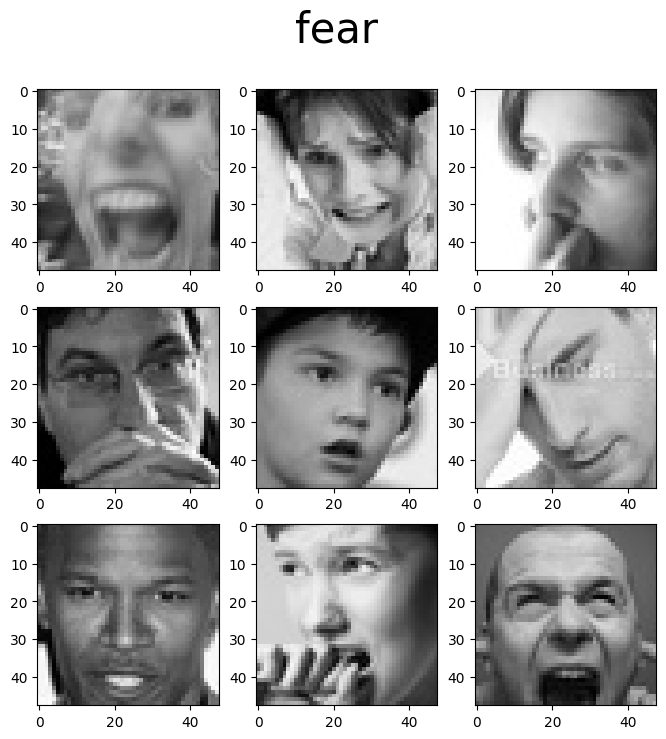

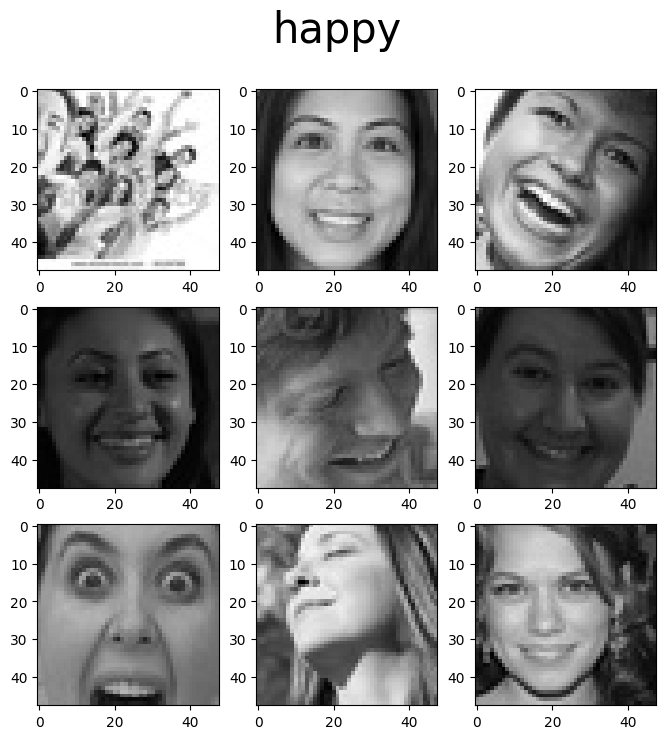

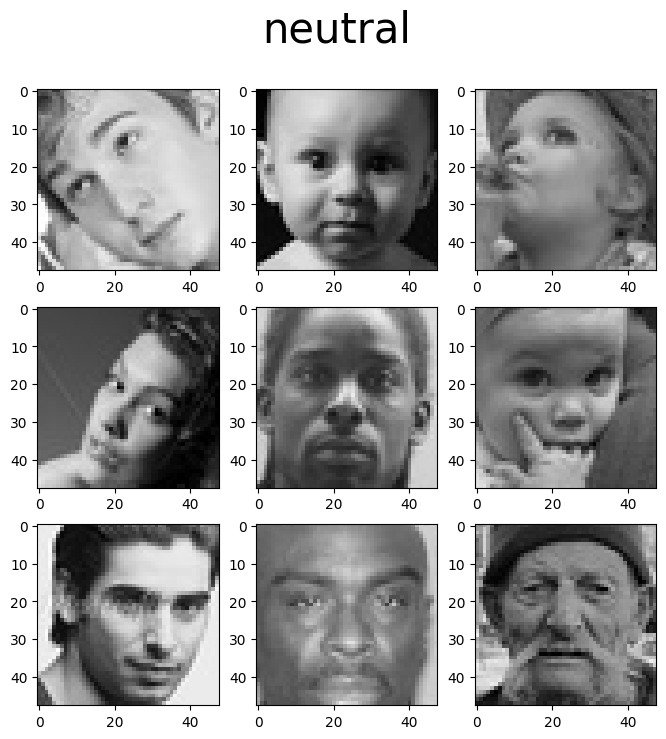

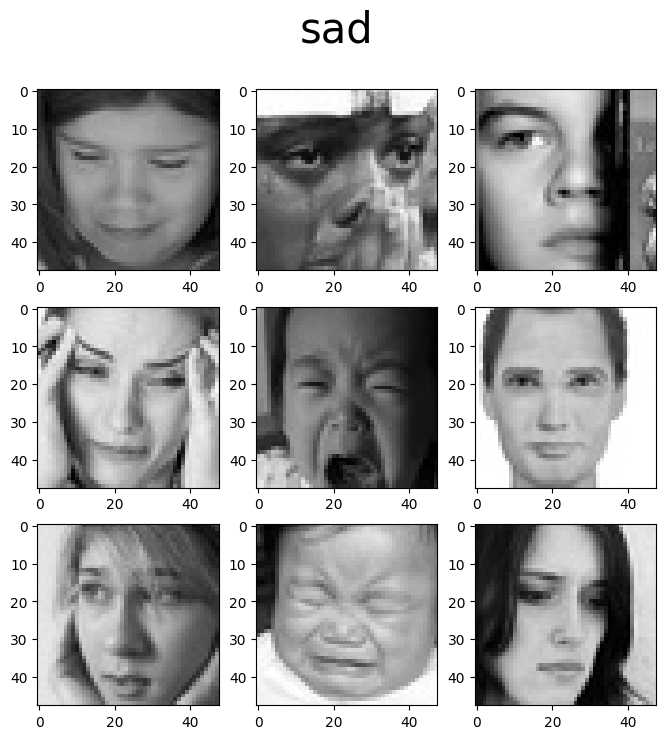

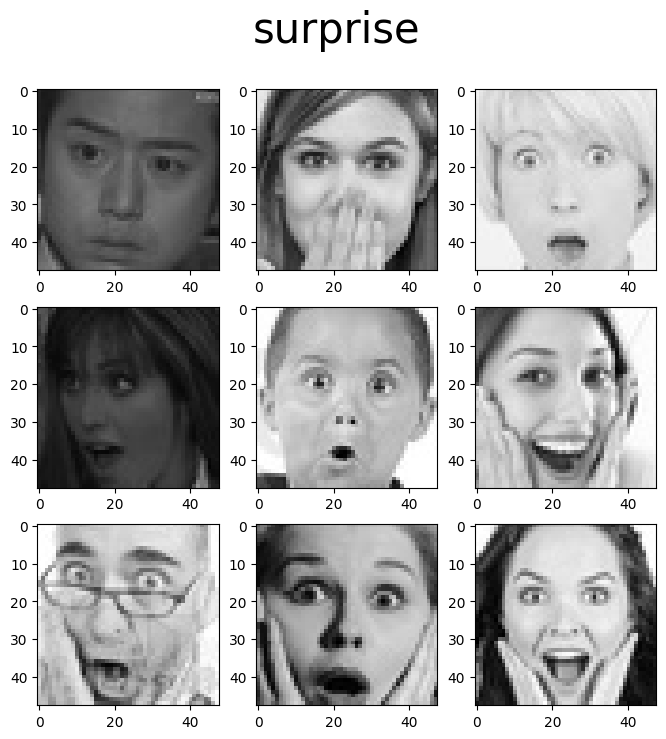

In [ ]:
# validation set images
for category in categories:
    plt.figure(figsize= (8,8))
    for j in range(1,10,1):

        plt.subplot(3,3,j)

        img = load_img(val_path+'/'+category+"/"+
                    os.listdir(val_path + "/" + category)[j], target_size=(48,48))
        plt.imshow(img)
    plt.suptitle(category,fontsize=30)
    plt.show()

## ***2. Data Augmentation***

In [ ]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory = train_path,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = val_path,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 23060 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.


In [ ]:
# Get the class indices (labels)
class_indices = train_generator.class_indices
print("Class Indices (Labels):", class_indices)

# Reverse the dictionary to get the class labels from indices
labels = {v: k for k, v in class_indices.items()}
print("Labels:", labels)

Class Indices (Labels): {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Labels: {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [ ]:
img_shape=train_generator.image_shape
img_shape

(48, 48, 1)

## ***3. CNN Model Custom Architecture***

## CNN Model Custom Architecture

- **Initial Setup:**
  - Start by defining the input layer tailored to the shape of the facial images.
  - Initialize the first convolutional block using a specified number of filters.

- **Feature Extraction:**
  - Stack several convolutional layers, gradually increasing the number of filters in each successive layer.
  - These layers help extract hierarchical features from the raw input images.
  - Each convolutional block is followed by a max-pooling layer to:
    - Reduce the spatial dimensionality of the feature maps
    - Lower computational requirements and control overfitting

- **Classification Phase:**
  - After extracting features, pass the output through fully connected (dense) layers.
  - Employ ReLU (Rectified Linear Unit) activation functions in the dense layers to enable advanced reasoning and effective classification.

- **Regularization:**
  - Integrate regularization strategies to enhance model generalization and reduce the risk of overfitting:
    - Apply dropout layers at various stages of the network to randomly deactivate neurons during training.
    - Include batch normalization layers after convolutional and dense blocks for stabilization and faster convergence.

- **Architectural Experimentation:**
  - Systematically test different network structures by varying:
    - The number of convolutional and dense layers
    - The size of filters (kernels) in each layer
  - Adjust these components to optimize the network’s learning capacity and effectiveness.

- **Optimization and Refinement:**
  - Perform hyperparameter tuning (e.g., adjusting learning rate, batch size, dropout rate) to maximize validation and test performance.
  - Use validation metrics to guide selection of the final robust architecture for accurate emotion recognition.


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Define the input layer
inputs = Input(shape=(48, 48, 1), name='input_layer_2')

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
# Add a batch normalization layer
x = BatchNormalization()(x)

# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
# Add a second batch normalization layer
x = BatchNormalization()(x)
# Add a max pooling layer with 2x2 pool size
x = MaxPooling2D(pool_size=(2, 2))(x)
# Add a dropout layer with 0.25 dropout rate
x = Dropout(0.25)(x)

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
# Add a third batch normalization layer
x = BatchNormalization()(x)

# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
# Add a fourth batch normalization layer
x = BatchNormalization()(x)
# Add a max pooling layer with 2x2 pool size
x = MaxPooling2D(pool_size=(2, 2))(x)
# Add a dropout layer with 0.25 dropout rate
x = Dropout(0.25)(x)

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
x = Conv2D(256, kernel_size=(3, 3), activation='relu')(x)
# Add a fifth batch normalization layer
x = BatchNormalization()(x)

# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
x = Conv2D(256, kernel_size=(3, 3), activation='relu')(x)
# Add a sixth batch normalization layer
x = BatchNormalization()(x)
# Add a max pooling layer with 2x2 pool size
x = MaxPooling2D(pool_size=(2, 2))(x)
# Add a dropout layer with 0.25 dropout rate
x = Dropout(0.25)(x)

# Flatten the output of the convolutional layers
x = Flatten()(x)
# Add a dense layer with 256 neurons and relu activation function
x = Dense(256, activation='relu')(x)

# Add a seventh batch normalization layer
x = BatchNormalization()(x)
# Add a dropout layer with 0.5 dropout rate
x = Dropout(0.5)(x)
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
outputs = Dense(7, activation='softmax')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,02

 Total params: 1,394,183 (5.32 MB)

 Trainable params: 1,391,943 (5.31 MB)

 Non-trainable params: 2,240 (8.75 KB)

## ***4. Compiling CNN Model***

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
epochs = 42
batch_size = 64

***CNN Model Training***

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

# Lower the learning rate if accuracy stops improving.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=8,
                                            verbose=1,
                                            factor=0.8,
                                            min_delta=1e-7,
                                            min_lr=1e-7)

# Define the filepath for saving the best model
model_checkpoint_path = 'best_model.keras'

# Define the callback
checkpoint_callback = ModelCheckpoint(
    model_checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

callbacks_list = [learning_rate_reduction, checkpoint_callback]

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,batch_size=batch_size,validation_data = validation_generator,callbacks=[callbacks_list])

Epoch 1/42


c:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.1704 - loss: 2.9812
Epoch 1: val_accuracy improved from -inf to 0.18852, saving model to best_model.keras
361/361 ━━━━━━━━━━━━━━━━━━━━ 80s 216ms/step - accuracy: 0.1705 - loss: 2.9808 - val_accuracy: 0.1885 - val_loss: 2.0038 - learning_rate: 1.0000e-04
Epoch 2/42
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.2058 - loss: 2.5346
Epoch 2: val_accuracy improved from 0.18852 to 0.33097, saving model to best_model.keras
361/361 ━━━━━━━━━━━━━━━━━━━━ 67s 185ms/step - accuracy: 0.2058 - loss: 2.5344 - val_accuracy: 0.3310 - val_loss: 1.7670 - learning_rate: 1.0000e-04
Epoch 3/42
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.2505 - loss: 2.2794
Epoch 3: val_accuracy improved from 0.33097 to 0.36428, saving model to best_model.keras
361/361 ━━━━━━━━━━━━━━━━━━━━ 71s 196ms/step - accuracy: 0.2505 - loss: 2.2793 - val_accuracy: 0.3643 - val_loss: 1.6610 - learning_rate: 1.0000e-04
Epoch 4/42
361/361 ━━━━━━━━━━━━━━━━━━━━

***CNN Model Evaluation***

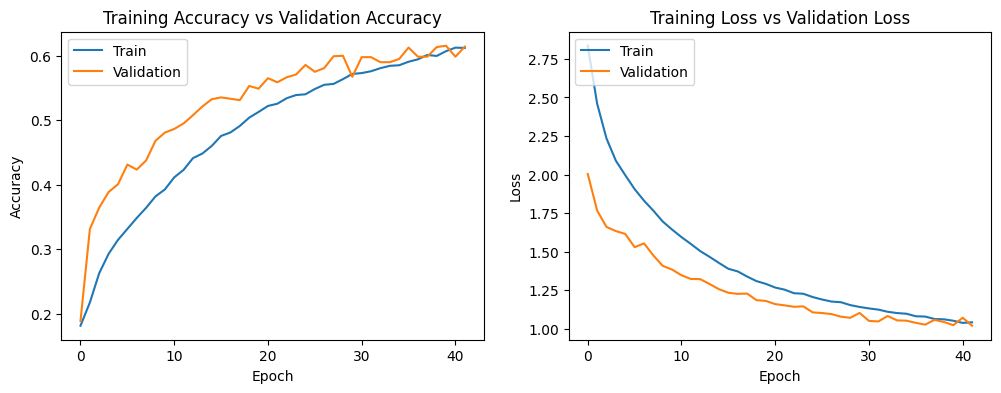

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

# Plot the train and validation accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot the train and validation Loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

***Confusion Matrix***

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


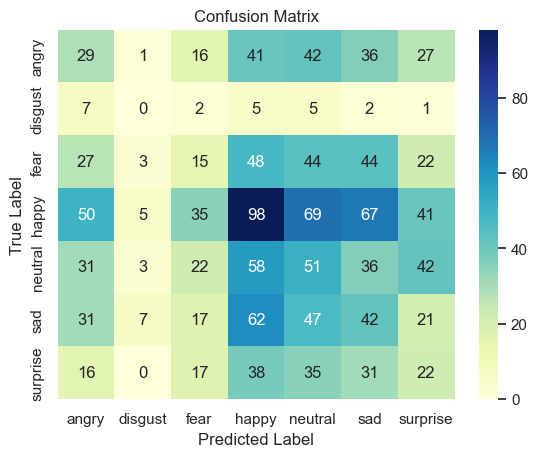

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_generator, steps=len(train_generator))
print(f'Training Accuracy: {train_accuracy*100:.2f}%')

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')

361/361 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.6537 - loss: 0.9290
Training Accuracy: 64.58%
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6040 - loss: 1.0306
Validation Accuracy: 61.37%


***Testing Random Validation Data***

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


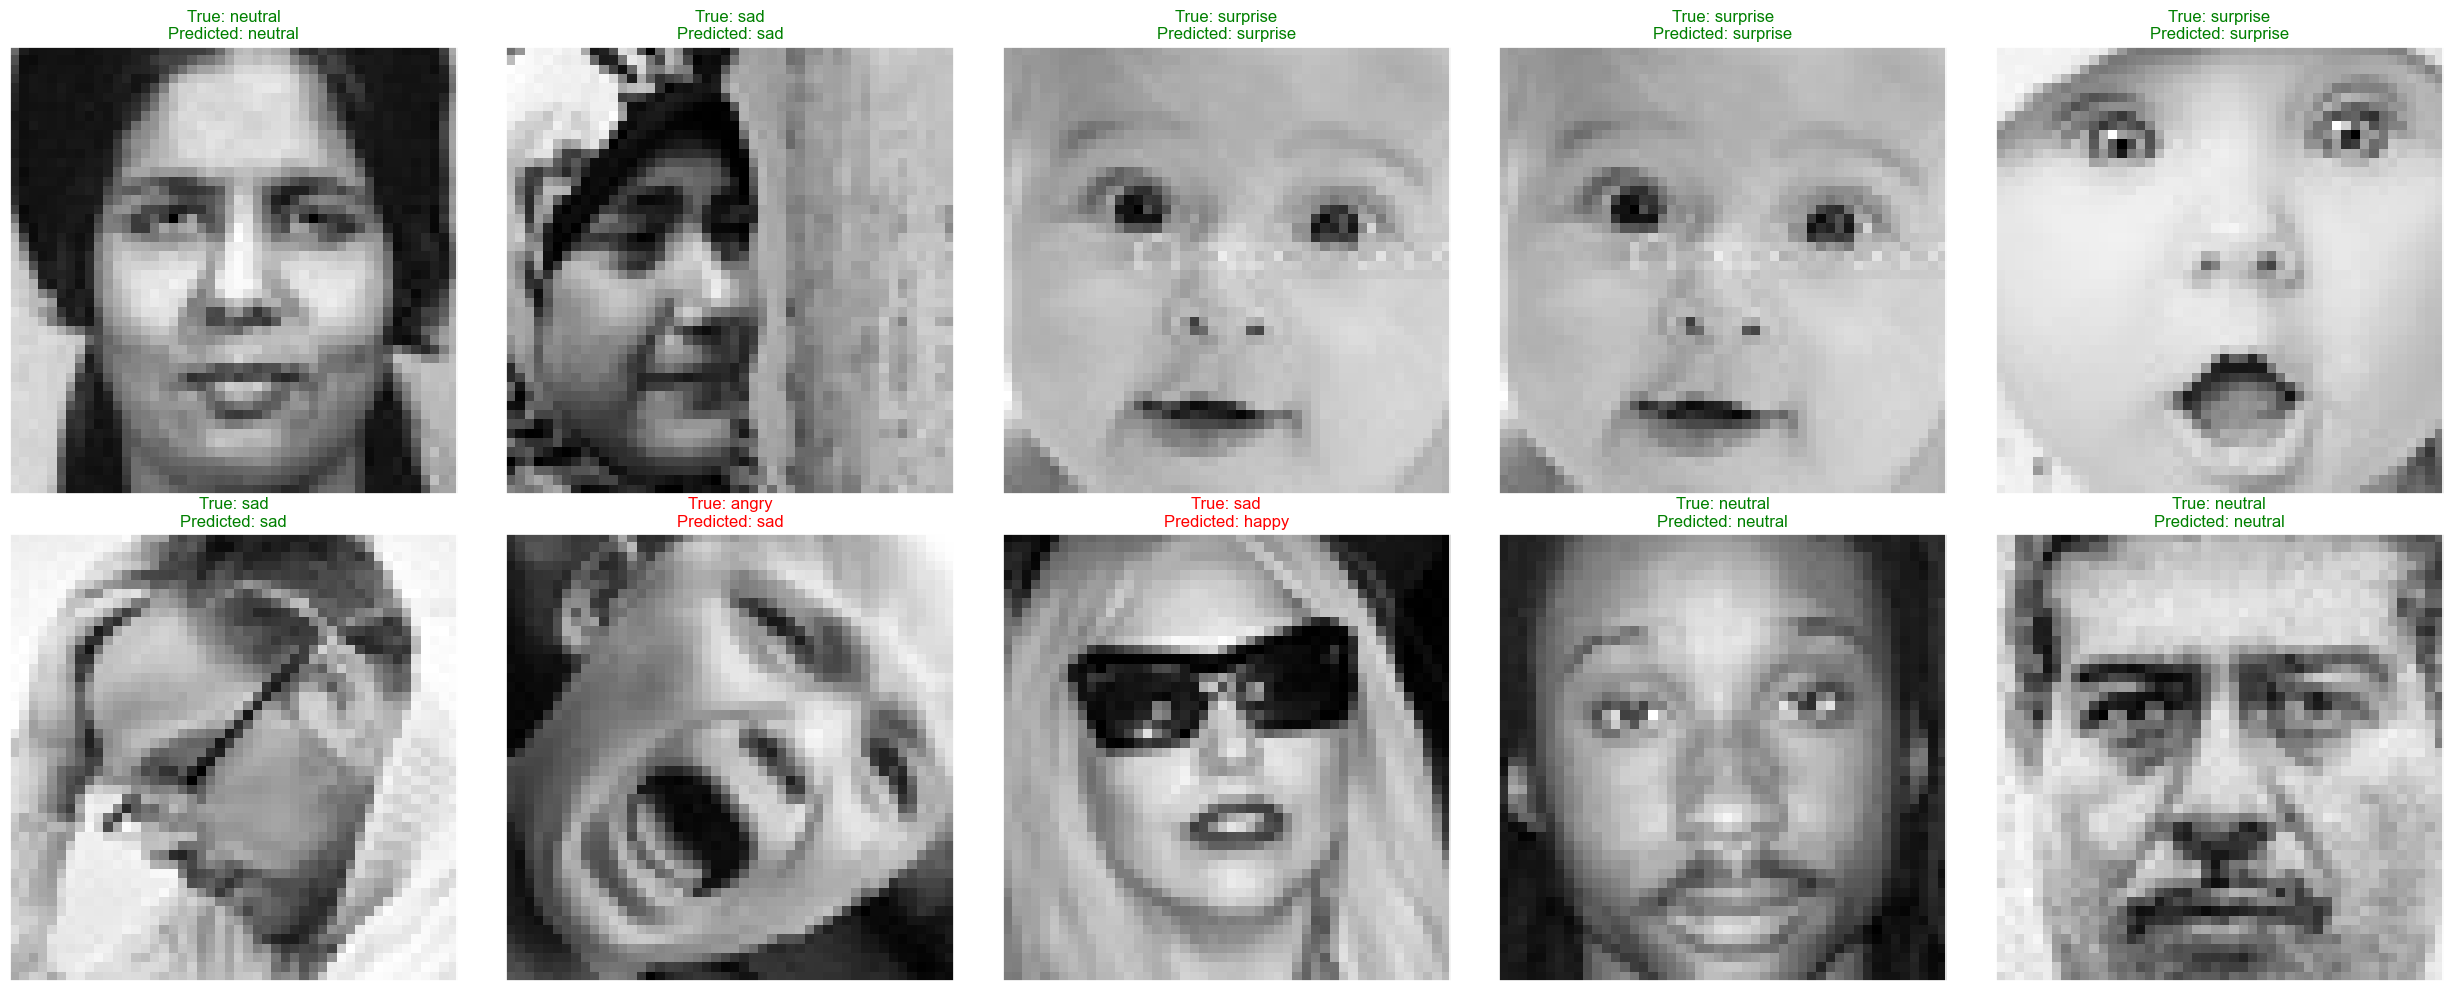

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the emotion labels
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}



# Get the batch size from the validation generator
batch_size = validation_generator.batch_size

# Generate random batch and image indices
random_batch = np.random.randint(0, len(validation_generator) - 1)
random_img_indices = np.random.randint(0, batch_size, 10)

# Create a plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Get a random image and its true label from the validation data
    random_img = validation_generator[random_batch][0][random_img_indices[i]]
    random_img_label = np.argmax(validation_generator[random_batch][1][random_img_indices[i]])
    print(type(random_img))
    # Predict the label using the model
    model_prediction = np.argmax(model.predict(tf.expand_dims(random_img, axis=0), verbose=0))

    # Display the image
    ax.imshow(random_img.squeeze(), cmap='gray')

    # Determine the color of the title (green if correct, red if incorrect)
    if labels[random_img_label] == labels[model_prediction]:
        color = "green"
    else:
        color = "red"

    # Set the title of the subplot
    ax.set_title(f"True: {labels[random_img_label]}\nPredicted: {labels[model_prediction]}", color=color)

# Show the plot
plt.tight_layout()
plt.show()

***Saving The Model***

In [ ]:
# Save the entire model
model.save('cnn_model_new_.h5')

In [ ]:
face_haar_cascade = cv2.CascadeClassifier('/kaggle/input/real-time/haarcascade_frontalface_default.xml')

## ***5. Transfer Learning Using ResNet50V2 Model***

In [ ]:
# specifing new image shape for resnet
img_shape = 224
batch_size = 64

In [ ]:
train_dir = 'images/train'
test_dir = 'images/validation'

### **Data Augmentation in ResNet50V2 Model**

In [ ]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

In [ ]:
train_data = train_preprocessor.flow_from_directory(
    train_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)

test_data = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


### **Fine-Tuning ResNet50V2**

In [ ]:
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )

ResNet50V2.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [ ]:
# Freezing all layers except last 50

ResNet50V2.trainable = True

for layer in ResNet50V2.layers[:-50]:
    layer.trainable = False

### **Adding Custom Final Output Layers in ResNet50V2 Model**

In [ ]:
def Create_ResNet50V2_Model():

    model = Sequential([
                      ResNet50V2,
                      Dropout(.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(.5),
                      Dense(7,activation='softmax')
                    ])
    return model

In [ ]:
ResNet50V2_Model = Create_ResNet50V2_Model()

ResNet50V2_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 7, 7, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     6,422,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,996,295 (114.43 MB)

 Trainable params: 22,779,527 (86.90 MB)

 Non-trainable params: 7,216,768 (27.53 MB)

In [ ]:
ResNet50V2_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

# Create Callback Checkpoint
checkpoint_path = "ResNet50V2_Best_Model.keras"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True,mode='max',verbose=1)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.00005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [ ]:
# Print the values to check them
print(f"Steps per epoch: {steps_per_epoch}, Validation steps: {validation_steps}")

Steps per epoch: 450, Validation steps: 110


### **Training the ResNet50V2 Model**

In [ ]:
# ResNet50V2_history = ResNet50V2_Model.fit(train_data ,validation_data = test_data , epochs=15, batch_size=batch_size,
#                                          callbacks = callbacks, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

ResNet50V2_history = ResNet50V2_Model.fit(
    train_data,
    validation_data=test_data,
    epochs=15,
    callbacks=callbacks,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 1022s 2s/step - accuracy: 0.5609 - loss: 1.2100 - val_accuracy: 0.6030 - val_loss: 1.0653 - learning_rate: 0.0010
Epoch 2/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 121s 265ms/step - accuracy: 0.4844 - loss: 1.1516 - val_accuracy: 0.6040 - val_loss: 1.0626 - learning_rate: 0.0010
Epoch 3/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 1006s 2s/step - accuracy: 0.5993 - loss: 1.1040 - val_accuracy: 0.6021 - val_loss: 1.0985 - learning_rate: 0.0010
Epoch 4/15
  1/450 ━━━━━━━━━━━━━━━━━━━━ 14:37 2s/step - accuracy: 0.5781 - loss: 0.9976
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
450/450 ━━━━━━━━━━━━━━━━━━━━ 122s 267ms/step - accuracy: 0.5781 - loss: 0.9976 - val_accuracy: 0.6041 - val_loss: 1.0945 - learning_rate: 0.0010
Epoch 5/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 1557s 3s/step - accuracy: 0.6328 - loss: 1.0084 - val_accuracy: 0.6473 - val_loss: 0.9526 - learning_rate: 2.0000e-04
Epoch 6/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 140s 308ms/step - accuracy: 

***ResNet50V2 Model Evaluation***

In [ ]:
ResNet50V2_Score = ResNet50V2_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(ResNet50V2_Score[0]))
print("Test Accuracy: {:.2f}%".format(ResNet50V2_Score[1] * 100))

111/111 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.6323 - loss: 1.0076
    Test Loss: 0.89509
Test Accuracy: 67.53%


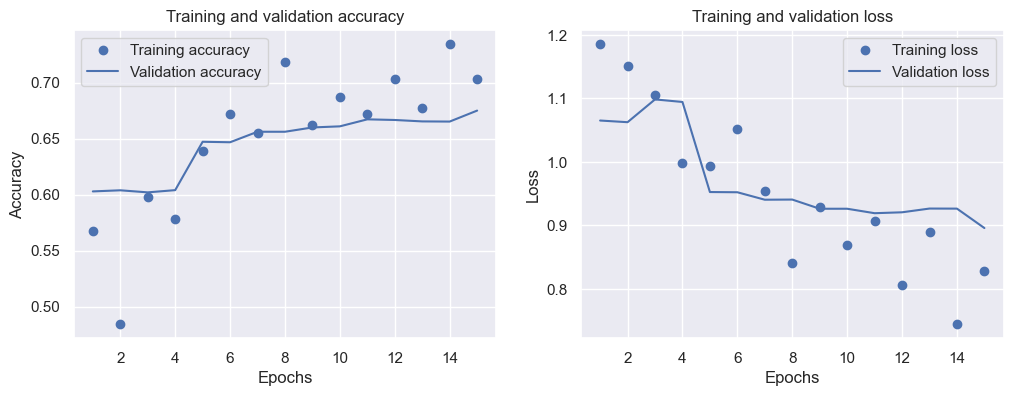

In [ ]:
import matplotlib.pyplot as plt

def plot_curves(history):
    """
    Plot training & validation accuracy and loss curves.

    Parameters:
    history (History): The history object returned by the fit method of a Keras model.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Assuming ResNet50V2_history is the history object returned by the fit method of a Keras model
plot_curves(ResNet50V2_history)

In [ ]:
ResNet50V2_Predictions = ResNet50V2_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction
ResNet50V2_Predictions = np.argmax(ResNet50V2_Predictions, axis=1)

111/111 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step


Text(0.5, 1.0, 'ResNet50V2 Confusion Matrix')

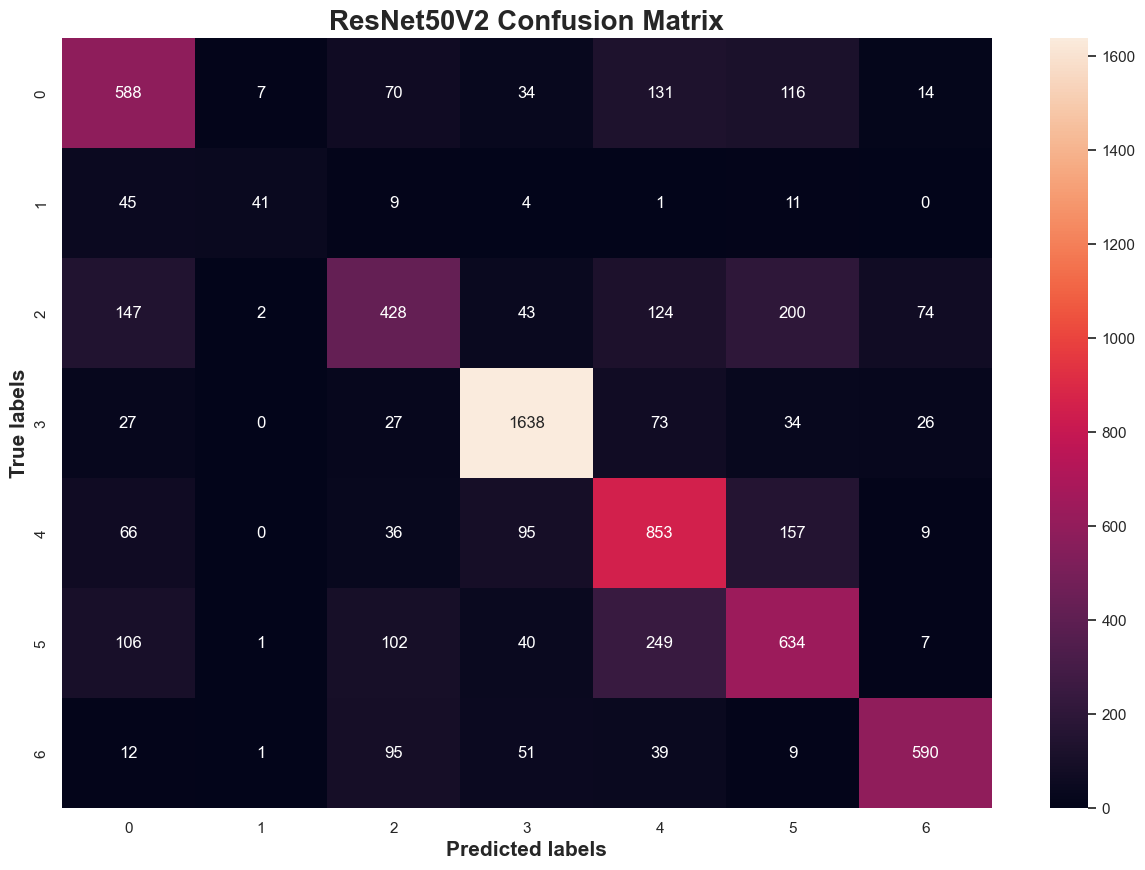

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig , ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, ResNet50V2_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('ResNet50V2 Confusion Matrix', fontsize=20, fontweight='bold')

### ***Testing Random Validation Data***

In [ ]:
Emotion_Classes = ['Angry',
                  'Disgust',
                  'Fear',
                  'Happy',
                  'Neutral',
                  'Sad',
                  'Surprise']

In [ ]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

Found 7066 images belonging to 7 classes.


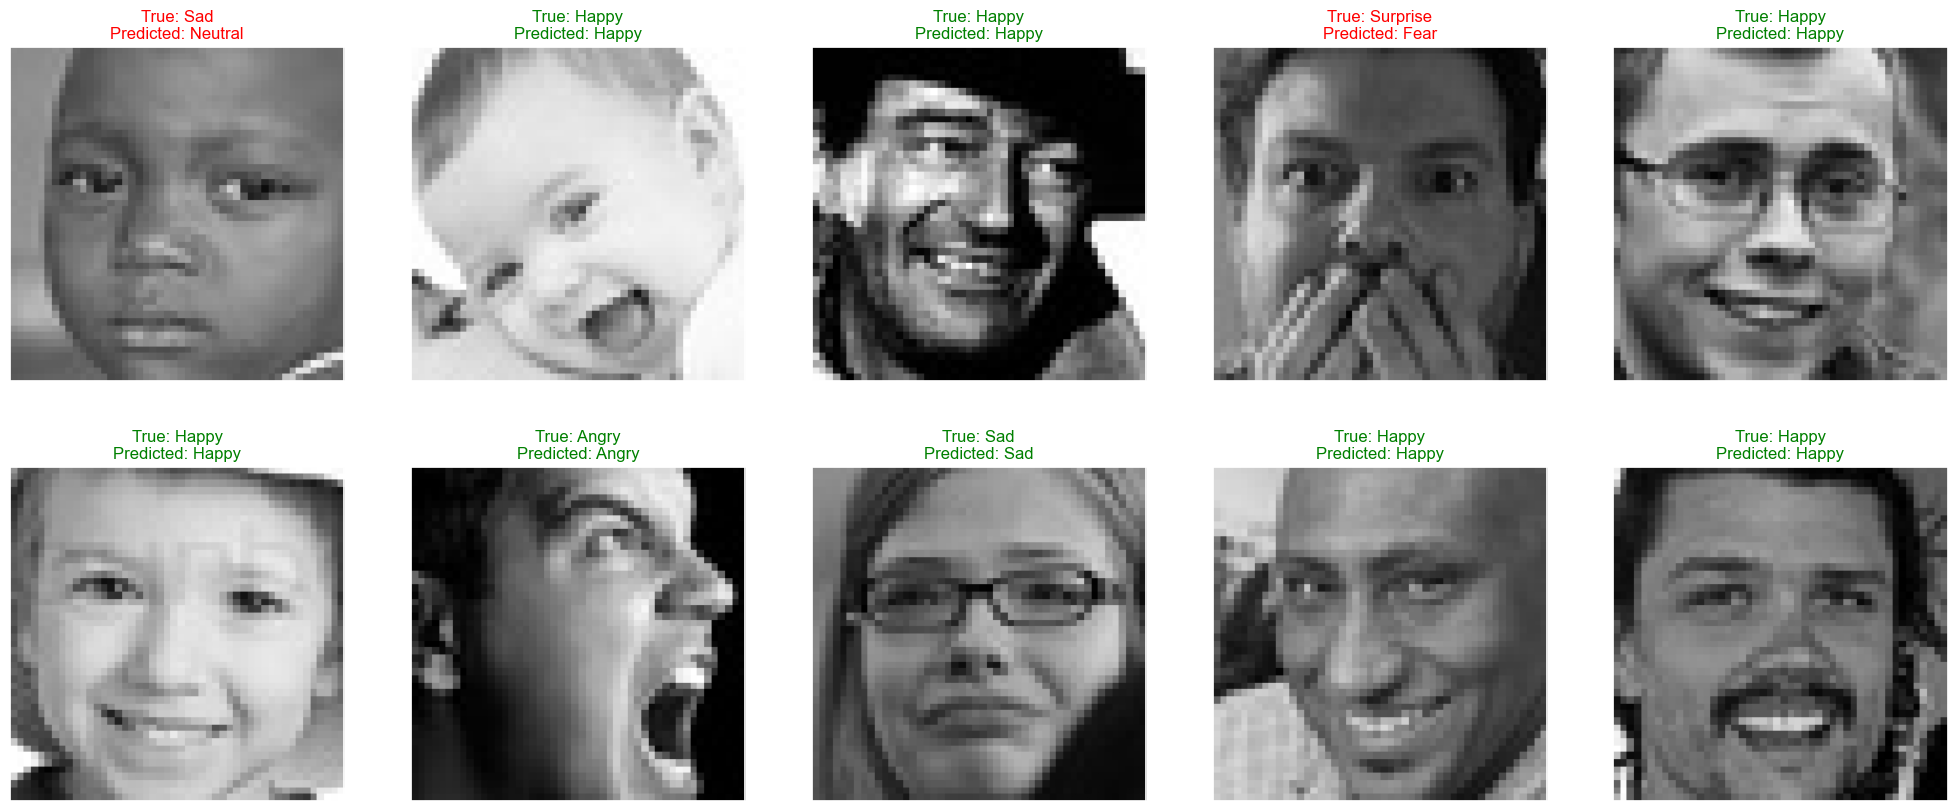

<Figure size 640x480 with 0 Axes>

In [ ]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(ResNet50V2_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

***Saving the ResNet50V2 Model***

In [ ]:
ResNet50V2_Model.save("ResNet50V2_Model.h5")

# **Conclusion**

## Conclusion

- The DeepFER project demonstrates the effective use of deep learning—particularly Convolutional Neural Networks (CNNs) and Transfer Learning—for classifying facial emotions into seven distinct categories.
- Leveraging the FER-2013 dataset, applying comprehensive preprocessing, and utilizing model optimization techniques, the project delivers a robust and reliable emotion recognition system.

- This work highlights the potential of artificial intelligence in interpreting human emotions, opening avenues for practical applications such as:
  - Mental health diagnostics
  - Adaptive learning environments
  - Human-computer interaction systems

- **Opportunities for future work include:**
  - Enhancing model accuracy through ensemble learning methods
  - Extending to multi-modal emotion recognition by integrating audio and text data
  - Deploying models for efficient real-time emotion inference in various practical settings


### ***Hurrah! You have successfully completed your Deep Learning for Computer Vision Capstone Project !!!***